<a href="https://colab.research.google.com/github/Victor-Ukeoma/Dry-bean-classification/blob/main/Prediction_of_Health_Categories_in_Chronic_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTION OF HEALTH CATEGORIES IN CHRONIC DISEASES.
MSc DATA SCIENCE PROJECT
13056933

Import all necessary libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import pandas as pd
import math
from math import log

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

Read CSV file

In [2]:
#load dataset
Health_data = pd.read_csv('/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')

<ipython-input-2-ae5b71038b99>:2: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  Health_data = pd.read_csv('/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')


DATA PREPROCESSING

Inspect dataframe for null values

In [3]:
Health_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       250937 non-null  object 
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Response                    0 non-null       float64
 10  Data_Value_Unit             250937 non-null  object 
 11  DataValueTypeID             250937 non-null  object 
 12  Data_Value_Type             250937 non-null  object 
 13  Data_Value    

In [4]:
#find the shape of the dataset
Health_data.shape

(250937, 39)

In [5]:
#find the statistical summary of dataset
Health_data.describe()

,YearStart,YearEnd,Response,Data_Value,Data_Value_Alt,Sample_Size,StratificationCategory3,Stratification3,ResponseID,LocationID,StratificationCategoryID3,StratificationID3,Report
count,250937.000000,250937.000000,0.0,169302.000000,169302.000000,0.0,0.0,0.0,0.0,250937.000000,0.0,0.0,0.0
mean,2017.940933,2018.169716,NaN,37.328349,37.328349,NaN,NaN,NaN,NaN,793.866437,NaN,NaN,NaN
std,2.031564,2.081039,NaN,25.213181,25.213181,NaN,NaN,NaN,NaN,2502.174327,NaN,NaN,NaN
min,2015.000000,2015.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,2016.000000,2016.000000,NaN,15.700000,15.700000,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN
50%,2018.000000,2018.000000,NaN,32.300000,32.300000,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN
75%,2020.000000,2020.000000,NaN,56.000000,56.000000,NaN,NaN,NaN,NaN,49.000000,NaN,NaN,NaN
max,2021.000000,2021.000000,NaN,100.000000,100.000000,NaN,NaN,NaN,NaN,9004.000000,NaN,NaN,NaN


Some of the columns with 0 non null values have no data in them, therefore we will delete them from dataset





In [6]:
#Delete the 8 columns with 0 non-null values
Health_data = Health_data.drop(['Response', 'Sample_Size', 'StratificationCategory3', 'Stratification3',
              'ResponseID', 'StratificationCategoryID3', 'StratificationID3', 'Report'],
              axis = 1)
#confirm dropped columns
Health_data.shape

(250937, 31)

Visaulising Numerical Variables to Understand Data Distribution.
We check if data is skewed with Histogram plot.
Also check For Correlation between variables with a heatmap.

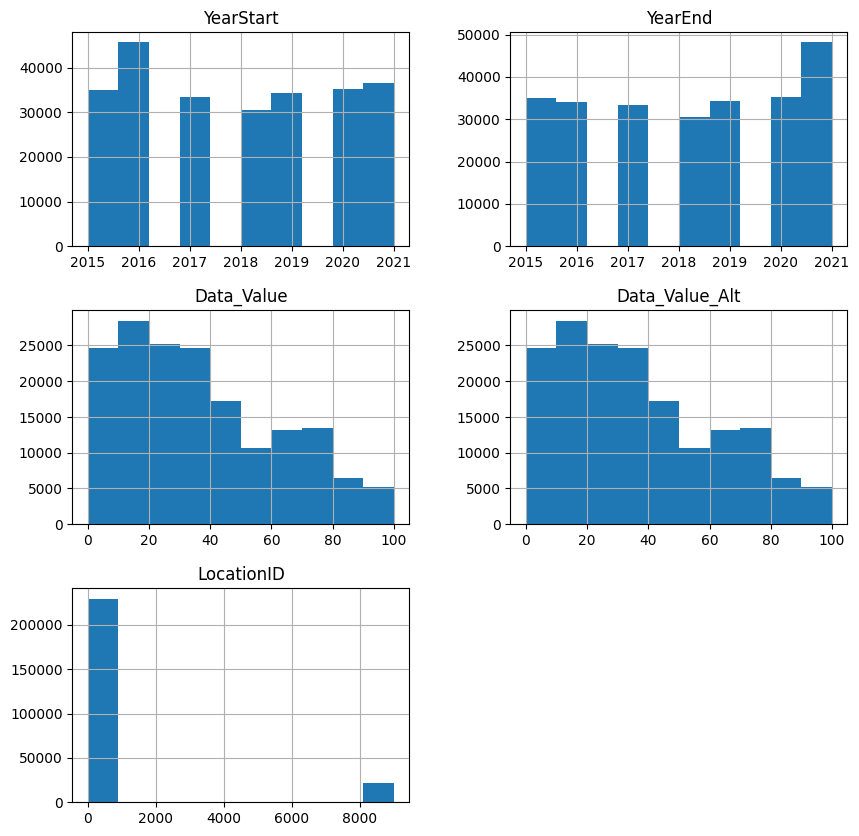

In [7]:
#Plot Histogram
plt.rcParams["figure.figsize"] = (10, 10)
Health_data.hist(bins=10)
plt.show()

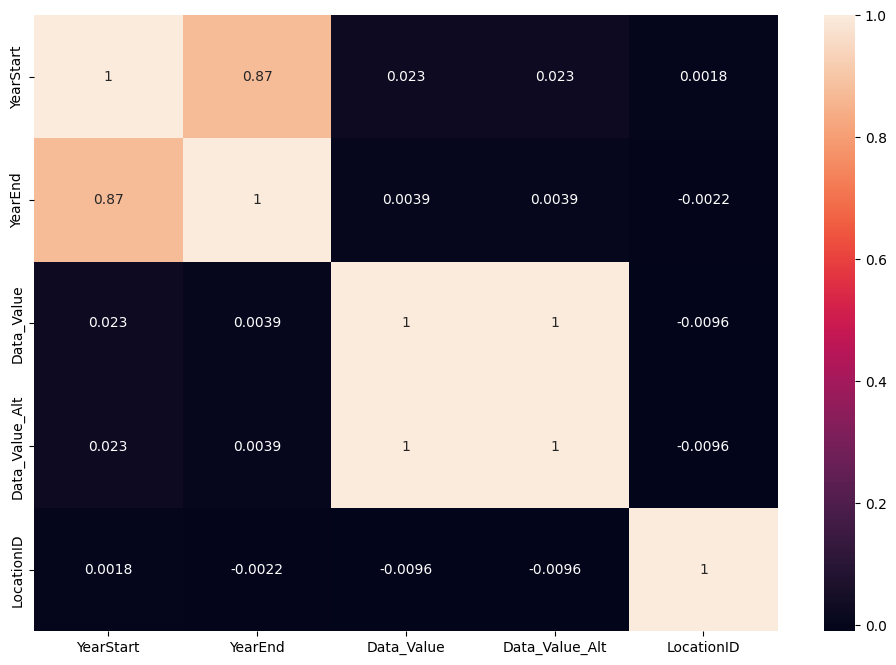

In [8]:
#Plot Correlation Heatmap
plt.figure(figsize=(12,8))
ax = sns.heatmap(Health_data.corr(numeric_only = True), annot=True)
plt.show();

Further Exploration to View CLass (Target Variable) Distribution

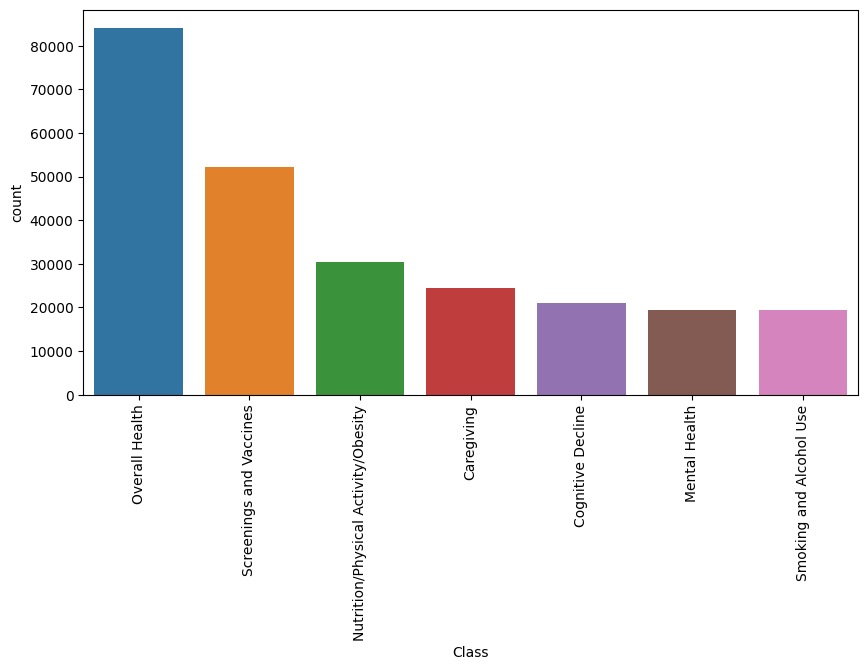

In [9]:
#Plot Count plot to view distribution in Class Variable
plt.figure(figsize=(10,5))
sns.countplot(data = Health_data, x = 'Class', order=Health_data['Class'].value_counts().index)
plt.xticks(rotation = 90);

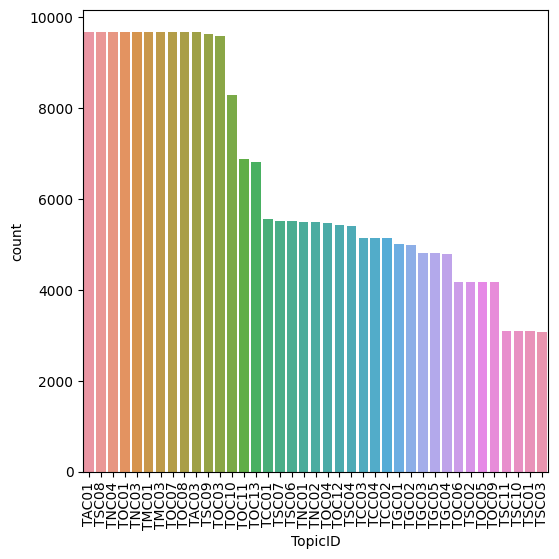

In [10]:
#Distribution of Topic
plt.figure(figsize=(6,6))
sns.countplot(data = Health_data, x = 'TopicID', order=Health_data['TopicID'].value_counts().index)
plt.xticks(rotation = 90);

In [11]:
#separating categorical variables from numerical variables
def separate_categorical_numerical(df):
    """
    Separate categorical and numerical variables from a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.

    Returns:
        DataFrame: DataFrame containing only the categorical variables.
        DataFrame: DataFrame containing only the numerical variables.
    """
    categorical_vars = df.select_dtypes(include=['object', 'category'])
    numerical_vars = df.select_dtypes(include=['int64', 'float64'])

    return categorical_vars, numerical_vars

categorical_df, numerical_df = separate_categorical_numerical(Health_data)

Data Cleaning and processing

In [12]:
Health_data.shape

(250937, 31)

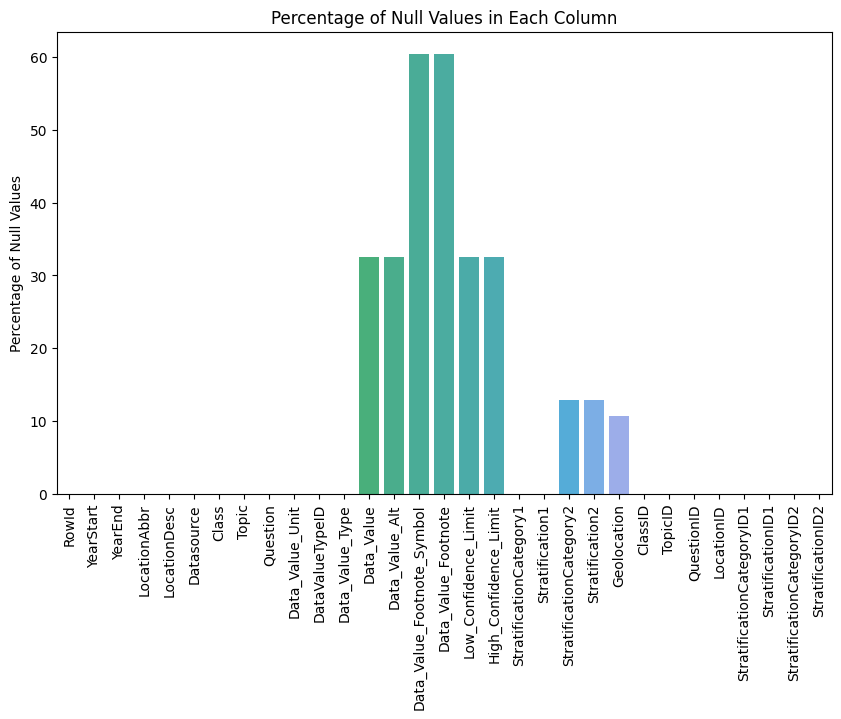

In [13]:
# Calculate the percentage of null values in each column
null_percent = (Health_data.isnull().sum() / len(Health_data)) * 100

# Create a bar plot for columns with null values
plt.figure(figsize=(10, 6))
sns.barplot(x=null_percent.index, y=null_percent)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values in Each Column')
plt.show()


In [14]:
#find number of unique data in every column
Health_data.nunique()

RowId                         31676
YearStart                         7
YearEnd                           7
LocationAbbr                     59
LocationDesc                     59
Datasource                        1
Class                             7
Topic                            39
Question                         39
Data_Value_Unit                   2
DataValueTypeID                   2
Data_Value_Type                   2
Data_Value                     1000
Data_Value_Alt                 1000
Data_Value_Footnote_Symbol        5
Data_Value_Footnote               5
Low_Confidence_Limit           1979
High_Confidence_Limit          1968
StratificationCategory1           1
Stratification1                   3
StratificationCategory2           2
Stratification2                   7
Geolocation                      54
ClassID                           7
TopicID                          39
QuestionID                       39
LocationID                       59
StratificationCategoryID1   

In [15]:
#view first 5 rows of dataset
Health_data.head(5)

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2015~2015~9003~Q43~TOC11~AGE~OVERALL,2015,2015,SOU,South,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,NaN,NaN,C01,TOC11,Q43,9003,AGE,5064,OVERALL,OVERALL
1,BRFSS~2021~2021~01~Q03~TMC01~AGE~GENDER,2021,2021,AL,Alabama,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Female,POINT (-86.63186076199969 32.84057112200048),C05,TMC01,Q03,1,AGE,AGE_OVERALL,GENDER,FEMALE
2,BRFSS~2021~2021~41~Q27~TMC03~AGE~RACE,2021,2021,OR,Oregon,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,...,Hispanic,POINT (-120.15503132599969 44.56744942400047),C05,TMC03,Q27,41,AGE,AGE_OVERALL,RACE,HIS
3,BRFSS~2021~2021~31~Q27~TMC03~AGE~OVERALL,2021,2021,NE,Nebraska,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,...,NaN,POINT (-99.36572062299967 41.6410409880005),C05,TMC03,Q27,31,AGE,AGE_OVERALL,OVERALL,OVERALL
4,BRFSS~2021~2021~18~Q27~TMC03~AGE~GENDER,2021,2021,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,...,Female,POINT (-86.14996019399968 39.766910452000445),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,FEMALE


Explore columns to determine columns with redundant information and limited use and drop them

In [16]:
columns_to_check = ['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
                    'Class', 'Topic', 'Question','Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type',
                    'Data_Value', 'Data_Value_Alt','Low_Confidence_Limit', 'High_Confidence_Limit', 'StratificationCategory1','Stratification1',
                    'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID','LocationID',
                    'StratificationCategoryID1', 'StratificationID1','StratificationCategoryID2','StratificationID2']

# Create an empty dictionary to store unique values for each column
unique_values_dict = {}

# Loop through the selected columns and find unique values for each
for column in columns_to_check:
    unique_values_dict[column] = Health_data[column].unique()

# Print the unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"Unique values in {column}: {unique_values}")


Unique values in YearStart: [2015 2021 2020 2016 2019 2017 2018]
Unique values in YearEnd: [2015 2021 2020 2016 2019 2017 2018]
Unique values in LocationAbbr: ['SOU' 'AL' 'OR' 'NE' 'IN' 'AZ' 'OH' 'VT' 'UT' 'WI' 'GA' 'IA' 'NRE' 'NC'
 'TN' 'SD' 'NV' 'MDW' 'MN' 'CO' 'ID' 'WEST' 'VI' 'CA' 'AR' 'FL' 'DE' 'CT'
 'HI' 'GU' 'KS' 'IL' 'LA' 'MD' 'KY' 'MA' 'ME' 'MI' 'MT' 'MS' 'MO' 'NH'
 'NJ' 'US' 'ND' 'NM' 'NY' 'PR' 'PA' 'RI' 'TX' 'VA' 'WA' 'WV' 'WY' 'OK'
 'DC' 'AK' 'SC']
Unique values in LocationDesc: ['South' 'Alabama' 'Oregon' 'Nebraska' 'Indiana' 'Arizona' 'Ohio'
 'Vermont' 'Utah' 'Wisconsin' 'Georgia' 'Iowa' 'Northeast'
 'North Carolina' 'Tennessee' 'South Dakota' 'Nevada' 'Midwest'
 'Minnesota' 'Colorado' 'Idaho' 'West' 'Virgin Islands' 'California'
 'Arkansas' 'Florida' 'Delaware' 'Connecticut' 'Hawaii' 'Guam' 'Kansas'
 'Illinois' 'Louisiana' 'Maryland' 'Kentucky' 'Massachusetts' 'Maine'
 'Michigan' 'Montana' 'Mississippi' 'Missouri' 'New Hampshire'
 'New Jersey' 'United States, DC & Territ

In [17]:
#find number of null values in each column
Health_data.isnull().sum()

RowId                              0
YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Data_Value_Unit                    0
DataValueTypeID                    0
Data_Value_Type                    0
Data_Value                     81635
Data_Value_Alt                 81635
Data_Value_Footnote_Symbol    151823
Data_Value_Footnote           151823
Low_Confidence_Limit           81785
High_Confidence_Limit          81785
StratificationCategory1            0
Stratification1                    0
StratificationCategory2        32376
Stratification2                32376
Geolocation                    26709
ClassID                            0
TopicID                            0
QuestionID                         0
LocationID                         0
S

In [18]:
#information of dataset
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       250937 non-null  object 
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Data_Value_Unit             250937 non-null  object 
 10  DataValueTypeID             250937 non-null  object 
 11  Data_Value_Type             250937 non-null  object 
 12  Data_Value                  169302 non-null  float64
 13  Data_Value_Alt

In [19]:
#confirm null values in both columns
print('null values in Data_Value column = ',
      Health_data['Data_Value'].isnull().sum())

print('null values in Data_Value_Alt column = ',
      Health_data['Data_Value_Alt'].isnull().sum())

count_false = len(Health_data[(Health_data['Data_Value'] == Health_data['Data_Value_Alt']) == False])
print('\nnull values in both columns = ',count_false)


null values in Data_Value column =  81635
null values in Data_Value_Alt column =  81635

null values in both columns =  81635


Drop columns with limited usefulness and redundant information

Reasons for droping columns
1.   RowID - Limited usefulness
2.   Datasource- limited usefulness
3.   Data_Value_Type - Redundant info present in Data_Value_TypeID
4.   Data_Value_Alt - Redundant info already present in Data_Value
5.   StratificationCategory1 - Limited usefullness
6.   StratificationCategory2 - Redundant info already in Stratification2
7.   StratificationCategoryID1 -Limited Usefulness
8.   StratificationID1 - Limited usefulness
9.   StratificationID2 - duplicated info
10.  StratificationCategoryID2 - Duplicated info




In [20]:
# List of column names to drop
columns_to_drop = ['RowId', 'Datasource', 'Data_Value_Type', 'Data_Value_Alt','StratificationCategory1','StratificationCategory2',
                   'StratificationCategoryID1','StratificationID1','StratificationID2','StratificationCategoryID2']

# Drop the specified columns
Health_data.drop(columns=columns_to_drop, inplace=True)
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  99114 non-null   object 
 11  Data_Value_Footnote         99114 non-null   object 
 12  Low_Confidence_Limit        169152 non-null  object 
 13  High_Confidenc

In [21]:
# check to see how many columns left
Health_data.shape

(250937, 21)

In [22]:
#Convert Low_confiidence and High_confidence columns to float
cols_to_float = ['Low_Confidence_Limit', 'High_Confidence_Limit']

for column in cols_to_float:
    Health_data[column] = pd.to_numeric(Health_data[column], errors='coerce').astype(float)

Health_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  99114 non-null   object 
 11  Data_Value_Footnote         99114 non-null   object 
 12  Low_Confidence_Limit        169126 non-null  float64
 13  High_Confidenc

Taking care of Null-values

In [23]:
#identify rows with the same null values
Health_data[Health_data['Data_Value'].isnull()][['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit']]


,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
149,NaN,NaN,NaN
220,NaN,NaN,NaN
300,NaN,NaN,NaN
301,NaN,NaN,NaN
306,NaN,NaN,NaN
...,...,...,...
250923,NaN,NaN,NaN
250927,NaN,NaN,NaN
250930,NaN,NaN,NaN
250933,NaN,NaN,NaN


Data_Value, Low_Confidence_Limit and High_Confidence_Limit have the same rows with null values, we have to drop those rows

In [24]:
#drop rows with null values
Health_data = Health_data.dropna(subset=['Data_Value'])
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169302 entries, 0 to 250935
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   169302 non-null  int64  
 1   YearEnd                     169302 non-null  int64  
 2   LocationAbbr                169302 non-null  object 
 3   LocationDesc                169302 non-null  object 
 4   Class                       169302 non-null  object 
 5   Topic                       169302 non-null  object 
 6   Question                    169302 non-null  object 
 7   Data_Value_Unit             169302 non-null  object 
 8   DataValueTypeID             169302 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  17479 non-null   object 
 11  Data_Value_Footnote         17479 non-null   object 
 12  Low_Confidence_Limit        169126 non-null  float64
 13  High_Confidenc

In [25]:
#Change All Null Values in 'Data_Value_Footnote' Column into 'No Data Available'

Health_data['Data_Value_Footnote'].fillna('No Data Available', inplace=True)

#Change All Null Values in 'Data_Value_Footnote_Symbol' Column into '~'

Health_data['Data_Value_Footnote_Symbol'].fillna('~', inplace = True)
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169302 entries, 0 to 250935
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   169302 non-null  int64  
 1   YearEnd                     169302 non-null  int64  
 2   LocationAbbr                169302 non-null  object 
 3   LocationDesc                169302 non-null  object 
 4   Class                       169302 non-null  object 
 5   Topic                       169302 non-null  object 
 6   Question                    169302 non-null  object 
 7   Data_Value_Unit             169302 non-null  object 
 8   DataValueTypeID             169302 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  169302 non-null  object 
 11  Data_Value_Footnote         169302 non-null  object 
 12  Low_Confidence_Limit        169126 non-null  float64
 13  High_Confidenc

In [26]:
#Change All Null Values in 'Stratification2' Column into 'Unknown'

Health_data['Stratification2'].fillna('Unknown', inplace = True)

#Change All Null Values in 'Geolocation' Column into 'Unknown'
Health_data['Geolocation'].fillna('0', inplace = True)
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169302 entries, 0 to 250935
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   169302 non-null  int64  
 1   YearEnd                     169302 non-null  int64  
 2   LocationAbbr                169302 non-null  object 
 3   LocationDesc                169302 non-null  object 
 4   Class                       169302 non-null  object 
 5   Topic                       169302 non-null  object 
 6   Question                    169302 non-null  object 
 7   Data_Value_Unit             169302 non-null  object 
 8   DataValueTypeID             169302 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  169302 non-null  object 
 11  Data_Value_Footnote         169302 non-null  object 
 12  Low_Confidence_Limit        169126 non-null  float64
 13  High_Confidenc

In [27]:
pd.set_option('display.max_rows', None)
#Health_data[Health_data['Low_Confidence_Limit'].isnull()][['Geolocation', 'Low_Confidence_Limit', 'High_Confidence_Limit']]

In [28]:
#Drop more rows with null same null values
Health_data = Health_data.dropna(subset=['Low_Confidence_Limit'])
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169126 entries, 0 to 250935
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   169126 non-null  int64  
 1   YearEnd                     169126 non-null  int64  
 2   LocationAbbr                169126 non-null  object 
 3   LocationDesc                169126 non-null  object 
 4   Class                       169126 non-null  object 
 5   Topic                       169126 non-null  object 
 6   Question                    169126 non-null  object 
 7   Data_Value_Unit             169126 non-null  object 
 8   DataValueTypeID             169126 non-null  object 
 9   Data_Value                  169126 non-null  float64
 10  Data_Value_Footnote_Symbol  169126 non-null  object 
 11  Data_Value_Footnote         169126 non-null  object 
 12  Low_Confidence_Limit        169126 non-null  float64
 13  High_Confidenc

All Null values have been taken care of.
Because number of Non - Null values in all columns are the same.

In [29]:
#Change relevant column names and simplify values

#simplify values of stratification1
Health_data['Stratification1'] = Health_data['Stratification1'].replace(['50-64 years', '65 years or older'], ['50-64', '65+'])
#change column names
Health_data.rename(columns={'Stratification1': 'Age Group'}, inplace=True)
Health_data.rename(columns={'Stratification2': 'Race/Gender'}, inplace=True)
#check info and confirm
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169126 entries, 0 to 250935
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   169126 non-null  int64  
 1   YearEnd                     169126 non-null  int64  
 2   LocationAbbr                169126 non-null  object 
 3   LocationDesc                169126 non-null  object 
 4   Class                       169126 non-null  object 
 5   Topic                       169126 non-null  object 
 6   Question                    169126 non-null  object 
 7   Data_Value_Unit             169126 non-null  object 
 8   DataValueTypeID             169126 non-null  object 
 9   Data_Value                  169126 non-null  float64
 10  Data_Value_Footnote_Symbol  169126 non-null  object 
 11  Data_Value_Footnote         169126 non-null  object 
 12  Low_Confidence_Limit        169126 non-null  float64
 13  High_Confidenc

In [30]:
#View changes made in column and investigate for more action
Health_data.head(4)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Age Group,Race/Gender,Geolocation,ClassID,TopicID,QuestionID,LocationID
0,2015,2015,SOU,South,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,36.8,...,No Data Available,35.9,37.7,50-64,Unknown,0,C01,TOC11,Q43,9003
1,2021,2021,AL,Alabama,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,15.5,...,No Data Available,13.4,17.9,Overall,Female,POINT (-86.63186076199969 32.84057112200048),C05,TMC01,Q03,1
2,2021,2021,OR,Oregon,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,23.5,...,No Data Available,16.0,33.2,Overall,Hispanic,POINT (-120.15503132599969 44.56744942400047),C05,TMC03,Q27,41
3,2021,2021,NE,Nebraska,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,13.6,...,No Data Available,12.6,14.6,Overall,Unknown,POINT (-99.36572062299967 41.6410409880005),C05,TMC03,Q27,31


In [31]:
#drppping further unnecessary columns
Drop_cols = ['LocationAbbr','LocationDesc','Topic','DataValueTypeID','Data_Value_Footnote','Geolocation','Question','Data_Value_Footnote_Symbol']
Health_data.drop(Drop_cols, axis=1, inplace=True)
Health_data.head(4)

,YearStart,YearEnd,Class,Data_Value_Unit,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age Group,Race/Gender,ClassID,TopicID,QuestionID,LocationID
0,2015,2015,Overall Health,%,36.8,35.9,37.7,50-64,Unknown,C01,TOC11,Q43,9003
1,2021,2021,Mental Health,%,15.5,13.4,17.9,Overall,Female,C05,TMC01,Q03,1
2,2021,2021,Mental Health,%,23.5,16.0,33.2,Overall,Hispanic,C05,TMC03,Q27,41
3,2021,2021,Mental Health,%,13.6,12.6,14.6,Overall,Unknown,C05,TMC03,Q27,31


In [32]:
#check how many columns left
Health_data.shape

(169126, 13)

In [33]:
#rename age group and gender columns using rename method with a dictionary
Health_data.rename(columns={'Age Group': 'Age_Group'}, inplace=True)
Health_data.rename(columns={'Race/Gender': 'Race_Gender'}, inplace=True)



Class Variable is a catgorical variable
We have to encode, with Label Encoder

In [34]:
# Extract the target variable (class) from the dataset
target = Health_data['Class']

# Create a LabelEncoder object and fit it to the target variable
labencoder = LabelEncoder()
labencoder.fit(target)

# Transform the target variable into numerical labels
labels = labencoder.transform(target)

# Print the unique class labels and their corresponding numerical labels
for i, class_label in enumerate(labencoder.classes_):
    print(f'{class_label}: {i}')

# Replace the 'Class' column with the numerical labels obtained from LabelEncoder
Health_data['Class'] = labels


Caregiving: 0
Cognitive Decline: 1
Mental Health: 2
Nutrition/Physical Activity/Obesity: 3
Overall Health: 4
Screenings and Vaccines: 5
Smoking and Alcohol Use: 6


In [35]:
#view number of row and column of dataset
Health_data.shape

(169126, 13)

FEATURE ENGINEERING

Manually Encoding Categorical Features

In [36]:
#Encode Age_Group Column
Age_Group = {'50-64':0, 'Overall':1, '65+':2}
Health_data['Age_Group'] = Health_data['Age_Group'].map(Age_Group)

#Encode Race_Gender Column
Race_Gender = {'Unknown':0,'Female':1, 'Hispanic':2, 'Male':3, 'White, non-Hispanic':4, 'Native Am/Alaskan Native':5, 'Black, non-Hispanic':6, 'Asian/Pacific Islander':7}
Health_data['Race_Gender'] = Health_data['Race_Gender'].map(Race_Gender)

#Encode ClassID column
Health_data['ClassID'].unique()
ClassID = {'C01':0, 'C05':1, 'C02':2, 'C07':3, 'C03':4, 'C04':5, 'C06':6}
Health_data['ClassID'] = Health_data['ClassID'].map(ClassID)

#Encode TopicID Column
Health_data['TopicID'].unique()
TopicID = {'TOC11':0, 'TMC01':1, 'TMC03':2, 'TOC03':3, 'TOC06':4, 'TNC02':5, 'TOC13':6,
           'TGC04':7, 'TSC08':8, 'TOC07':9, 'TOC12':10, 'TOC01':11, 'TNC04':12, 'TOC09':13,
           'TAC03':14, 'TNC01':15, 'TSC06':16, 'TSC09':17, 'TOC10':18, 'TOC04':19, 'TNC03':20,
           'TGC03':21, 'TAC01':22, 'TCC02':23, 'TCC01':24, 'TOC08':25, 'TCC03':26, 'TSC07':27,
           'TSC04':28, 'TCC04':29, 'TGC01':30, 'TGC05':31, 'TGC02':32, 'TOC05':33, 'TSC03':34,
           'TSC02':35, 'TSC11':36, 'TSC10':37, 'TSC01':38}

Health_data['TopicID'] = Health_data['TopicID'].map(TopicID)

#Encode QuestionID column
Health_data['QuestionID'].unique()

QuestionID = {'Q43':0, 'Q03':1, 'Q27':2, 'Q35':3, 'Q05':4, 'Q02':5, 'Q45':6,
           'Q39':7, 'Q18':8,'Q32':9, 'Q44':10, 'Q08':11, 'Q13':12, 'Q34':13,
           'Q21':14, 'Q01':15,'Q14':16, 'Q09':17, 'Q46':18, 'Q04':19, 'Q16':20,
           'Q38':21, 'Q17':22,'Q31':23, 'Q30':24, 'Q33':25, 'Q41':26, 'Q22':27,
           'Q19':28, 'Q42':29,'Q36':30, 'Q40':31, 'Q37':32, 'Q07':33, 'Q20':34,
           'Q15':35, 'Q11':36, 'Q10':37, 'Q12':38,}

Health_data['QuestionID'] = Health_data['QuestionID'].map(QuestionID)



In [37]:
#view changes made so far.
Health_data.head(4)

,YearStart,YearEnd,Class,Data_Value_Unit,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age_Group,Race_Gender,ClassID,TopicID,QuestionID,LocationID
0,2015,2015,4,%,36.8,35.9,37.7,0,0,0,0,0,9003
1,2021,2021,2,%,15.5,13.4,17.9,1,1,1,1,1,1
2,2021,2021,2,%,23.5,16.0,33.2,1,2,1,2,2,41
3,2021,2021,2,%,13.6,12.6,14.6,1,0,1,2,2,31


In [38]:
#Statistical summary of dataset
Health_data.describe()

,YearStart,YearEnd,Class,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age_Group,Race_Gender,ClassID,TopicID,QuestionID,LocationID
count,169126.000000,169126.000000,169126.000000,169126.000000,169126.000000,169126.000000,169126.000000,169126.000000,169126.000000,169126.000000,169126.000000,169126.000000
mean,2017.947199,2018.150420,3.470336,37.355369,32.698188,42.243840,0.982747,2.722018,2.263419,16.466067,16.466067,1133.003193
std,2.027434,2.072166,1.685345,25.191577,24.288904,26.165896,0.802228,2.075519,2.047841,10.321318,10.321318,2944.887351
min,2015.000000,2015.000000,0.000000,0.200000,-0.700000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2016.000000,2016.000000,3.000000,15.700000,12.400000,19.400000,0.000000,1.000000,0.000000,8.000000,8.000000,19.000000
50%,2018.000000,2018.000000,4.000000,32.300000,26.600000,38.300000,1.000000,3.000000,2.000000,16.000000,16.000000,35.000000
75%,2020.000000,2020.000000,5.000000,56.100000,48.400000,64.000000,2.000000,4.000000,4.000000,25.000000,25.000000,51.000000
max,2021.000000,2021.000000,6.000000,99.900000,99.600000,100.000000,2.000000,7.000000,6.000000,38.000000,38.000000,9004.000000


In [39]:
#check and drop duplicates
Health_data.drop_duplicates(inplace=True)


Health_data.drop('Data_Value_Unit', axis=1, inplace=True)


Health_data.drop('ClassID', axis=1, inplace=True)


In [40]:
#view final shape of dataset
Health_data.shape

(169126, 11)

In [41]:
#number of value counts of each class
Health_data.Class.value_counts()

4    58775
5    35357
3    21278
0    15987
1    12897
2    12671
6    12161
Name: Class, dtype: int64

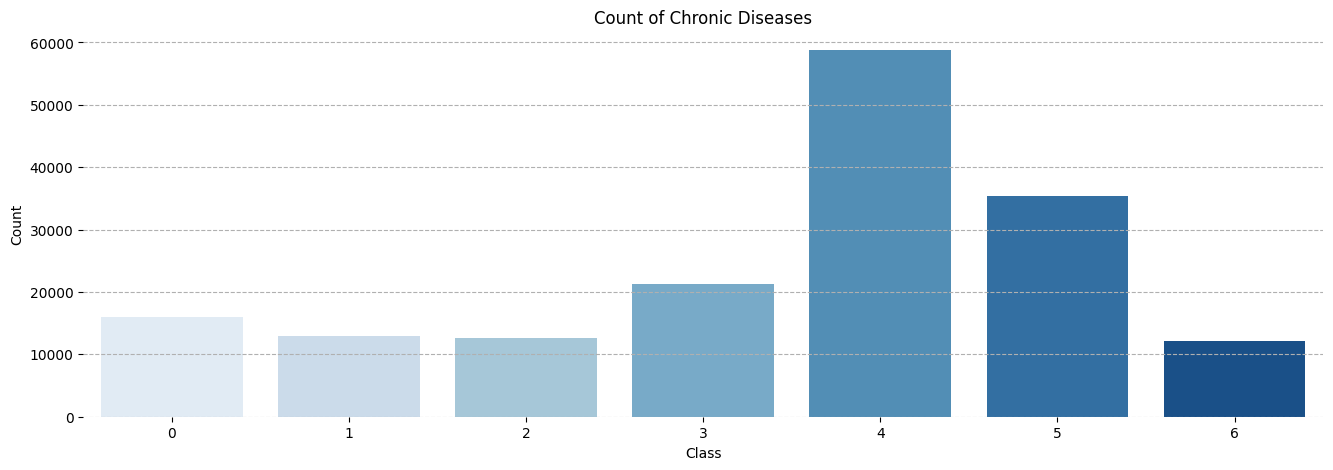

In [42]:
# Create a countplot
plt.figure(figsize=(16,5))
sns.countplot(x="Class", data=Health_data, palette="Blues")

plt.title("Count of Chronic Diseases")
plt.xlabel("Class")
plt.ylabel("Count")
sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


We still have an imbalanced model more on the (majority) class, we have to apply the undersampling and oversampling technique to try and normalise the data. but first I will try to apply one or two models to denote the results before and after balancing of the dataset.


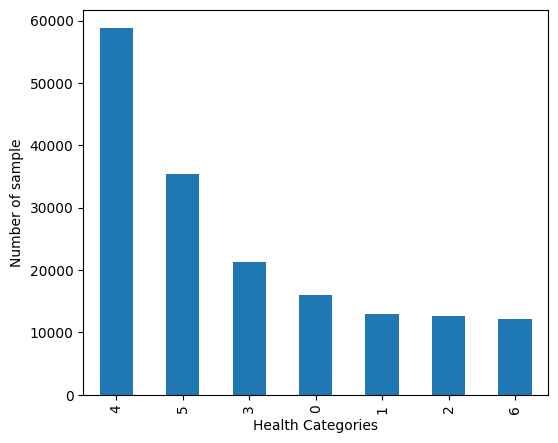

In [43]:
#view number of sample for each health category
plt.figure(figsize=(6,5))
count = Health_data['Class'].value_counts()
count.plot.bar()
plt.ylabel('Number of sample')
plt.xlabel('Health Categories')
plt.show()


In [44]:
# separating the target variable from feature variables
F_variables = []
for feature in Health_data.columns:
    if feature != 'Class':
        F_variables.append(feature)
X = Health_data[F_variables]
y = Health_data['Class']

slitting the dataset

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)


SCALING DATASET WITH STANDARD SCALER

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to Feautre data
scaler.fit(X_train)

# transform the data using the scaler
scaled_data = scaler.transform(X_test)

KNN MODEL UNBALANCED

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# create a k-nearest neighbors classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# fit the classifier to the training data
knn.fit(X_train, y_train)


# make predictions on the testing data
y_pred = knn.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')

KNN_report = classification_report(y_test, y_pred, digits=4)
print(KNN_report)



Accuracy: 0.93
              precision    recall  f1-score   support

           0     0.9223    0.9383    0.9303      4784
           1     0.9187    0.9361    0.9273      3946
           2     0.9774    0.9845    0.9809      3867
           3     0.9181    0.9251    0.9216      6340
           4     0.9298    0.9198    0.9248     17648
           5     0.9163    0.9138    0.9150     10572
           6     0.9658    0.9615    0.9636      3581

    accuracy                         0.9301     50738
   macro avg     0.9355    0.9399    0.9377     50738
weighted avg     0.9301    0.9301    0.9301     50738



Random Forest Unbalanced

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())

# Fit the classifier on the full training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-validation Scores: [0.9998733  0.9998733  0.99991553 0.99991553 0.99978882]
Mean Cross-validation Score: 0.9998732976125891
Accuracy: 0.999842327249793
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4784
           1       1.00      1.00      1.00      3946
           2       1.00      1.00      1.00      3867
           3       1.00      1.00      1.00      6340
           4       1.00      1.00      1.00     17648
           5       1.00      1.00      1.00     10572
           6       1.00      1.00      1.00      3581

    accuracy                           1.00     50738
   macro avg       1.00      1.00      1.00     50738
weighted avg       1.00      1.00      1.00     50738

Confusion Matrix:
[[ 4784     0     0     0     0     0     0]
 [    1  3945     0     0     0     0     0]
 [    0     0  3867     0     0     0     0]
 [    0     0     0  6338     1     0     1]
 [    0     1     0     

In [49]:
#installation of sci-kit metrics
!pip install scikit-plot

NVB UNBALANCED

In [50]:
cla = GaussianNB()
cla.fit(X_train, y_train)
y_pred = cla.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'NB Accuracy: {accuracy:.2f}')

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


NB Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      4784
           1       0.74      0.62      0.67      3946
           2       0.69      0.98      0.81      3867
           3       0.41      0.73      0.52      6340
           4       0.52      0.20      0.29     17648
           5       0.49      0.61      0.54     10572
           6       0.49      0.91      0.64      3581

    accuracy                           0.53     50738
   macro avg       0.58      0.66      0.59     50738
weighted avg       0.55      0.53      0.50     50738



In [51]:
Health_data.head(2)

,YearStart,YearEnd,Class,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age_Group,Race_Gender,TopicID,QuestionID,LocationID
0,2015,2015,4,36.8,35.9,37.7,0,0,0,0,9003
1,2021,2021,2,15.5,13.4,17.9,1,1,1,1,1


HANDLING CLASS IMBALANCE

In [52]:
import numpy as np
threshhold = count.median().astype(np.int64)
threshhold

15987

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Define the sampling strategy function
def Pipeline_strategy(y, threshhold, t='majority'):
    '''Create a sampling strategy for Undersampling or Oversampling'''
    Health_categories = ''
    if t == 'majority':
        Health_categories = y.value_counts() > threshhold
    elif t == 'minority':
        Health_categories = y.value_counts() < threshhold
    Cd = Health_categories[Health_categories == True].index
    Pipeline_strategy = {disease: threshhold for disease in Cd}
    return Pipeline_strategy

# Compute the sampling_strategy dictionary for undersampling
sampling_strategy_dict = Pipeline_strategy(y_train, threshhold, t='majority')

# Undersample the majority class
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_dict)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)



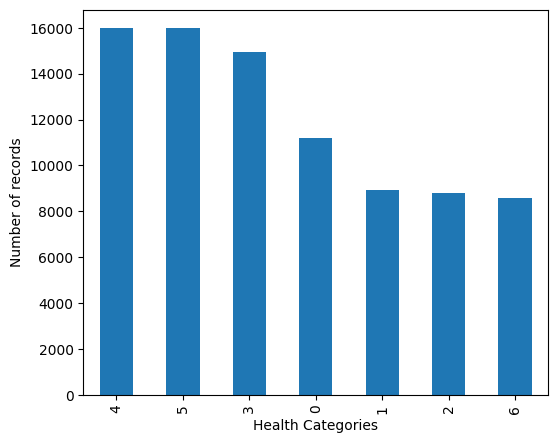

In [55]:
#visualising Undersampled class
plt.figure(figsize=(6,5))
count = y_under.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Health Categories')
plt.show()

APPLYING MODEL AFER UNDERSAMPLING

UNDERSAMPLED KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# create a k-nearest neighbors classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# fit the classifier to the training data
knn.fit(X_under, y_under)

# make predictions on the testing data
y_pred = knn.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred,)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.90


In [57]:
KNN_report = classification_report(y_test, y_pred, digits = 4)
print(KNN_report)

              precision    recall  f1-score   support

           0     0.8553    0.9565    0.9031      4784
           1     0.8942    0.9488    0.9207      3946
           2     0.9481    0.9920    0.9695      3867
           3     0.8340    0.9525    0.8893      6340
           4     0.9544    0.8231    0.8839     17648
           5     0.8715    0.9157    0.8930     10572
           6     0.9609    0.9620    0.9615      3581

    accuracy                         0.9036     50738
   macro avg     0.9026    0.9358    0.9173     50738
weighted avg     0.9080    0.9036    0.9032     50738



UNDERSAMPLED RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using cross-validation
cv_scores = cross_val_score(rf_classifier, X_under, y_under, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())

# Fit the classifier on the full training data
rf_classifier.fit(X_under, y_under)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-validation Scores: [0.99982238 0.99970397 0.99970397 0.99988159 0.99958555]
Mean Cross-validation Score: 0.9997394908229722
Accuracy: 0.9996846544995861
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4784
           1       1.00      1.00      1.00      3946
           2       1.00      1.00      1.00      3867
           3       1.00      1.00      1.00      6340
           4       1.00      1.00      1.00     17648
           5       1.00      1.00      1.00     10572
           6       1.00      1.00      1.00      3581

    accuracy                           1.00     50738
   macro avg       1.00      1.00      1.00     50738
weighted avg       1.00      1.00      1.00     50738

Confusion Matrix:
[[ 4784     0     0     0     0     0     0]
 [    0  3946     0     0     0     0     0]
 [    0     0  3867     0     0     0     0]
 [    0     0     0  6340     0     0     0]
 [    0     8     0    

UNDERSAMPLED DECISION TREES

UNDERSAMPLED NVB

In [59]:
cla = GaussianNB()
cla.fit(X_under, y_under)
y_pred = cla.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'NB Accuracy: {accuracy:.2f}')

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

NB Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      4784
           1       0.73      0.64      0.68      3946
           2       0.67      0.98      0.80      3867
           3       0.41      0.78      0.53      6340
           4       0.57      0.16      0.25     17648
           5       0.49      0.63      0.55     10572
           6       0.49      0.91      0.63      3581

    accuracy                           0.53     50738
   macro avg       0.58      0.67      0.58     50738
weighted avg       0.56      0.53      0.49     50738



UNDERSAMPLED LOGISTIC REGRESSION

In [60]:
regressor=LogisticRegression(random_state=0)
regressor.fit(X_under,y_under)
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.45      0.41      4784
           1       0.51      0.04      0.08      3946
           2       0.46      0.78      0.58      3867
           3       0.43      0.46      0.45      6340
           4       0.45      0.29      0.35     17648
           5       0.48      0.61      0.54     10572
           6       0.41      0.73      0.53      3581

    accuracy                           0.44     50738
   macro avg       0.44      0.48      0.42     50738
weighted avg       0.45      0.44      0.42     50738



SMOTE OVERSAMPLER

In [61]:
# Define the sampling strategy function for oversampling
def Pipeline_strategy_over(y, threshhold, t='majority'):
    '''Create a sampling strategy for Oversampling'''
    Health_categories = ''
    if t == 'majority':
        Health_categories = y.value_counts() > threshhold
    elif t == 'minority':
        Health_categories = y.value_counts() < threshhold
    Cd = Health_categories[Health_categories == True].index
    Pipeline_strategy = {disease: threshhold for disease in Cd}
    return Pipeline_strategy

# Compute the sampling_strategy dictionary for oversampling
sampling_strategy_dict_over = Pipeline_strategy_over(y_under, threshhold, t='minority')

# Apply SMOTE over-sampling to the under-sampled data
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(sampling_strategy=sampling_strategy_dict_over, k_neighbors=3)
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

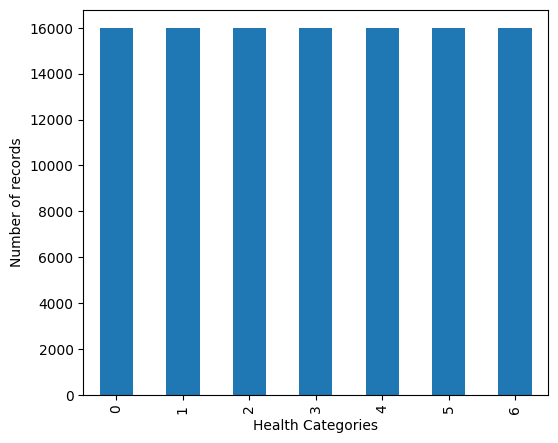

In [62]:
#View balanced class
plt.figure(figsize=(6,5))
count = y_bal.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Health Categories')
plt.show()

BALANCED KNN

In [63]:
# create a k-nearest neighbors classifier with k=3
clf_knn = KNeighborsClassifier(n_neighbors=5, metric= 'euclidean', p=3)

# fit the classifier to the training data
clf_knn.fit(X_bal, y_bal)

# make predictions on the testing data
y_pred = clf_knn.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.2f}')

KNN Accuracy: 0.89


In [64]:
KNN_report = classification_report(y_test, y_pred)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4784
           1       0.88      0.96      0.92      3946
           2       0.93      0.99      0.96      3867
           3       0.81      0.95      0.87      6340
           4       0.96      0.80      0.87     17648
           5       0.87      0.91      0.89     10572
           6       0.94      0.97      0.96      3581

    accuracy                           0.89     50738
   macro avg       0.89      0.93      0.91     50738
weighted avg       0.90      0.89      0.89     50738



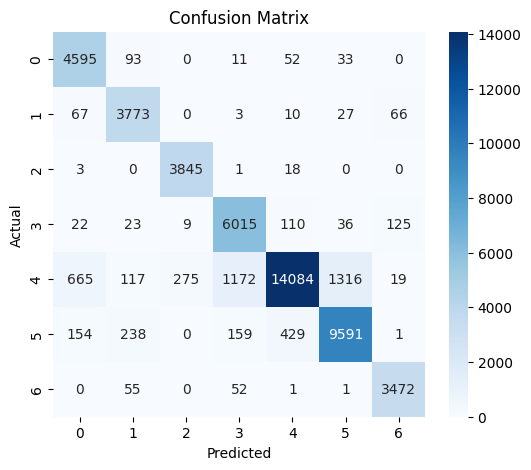

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5))
# Create the confusion matrix
con_matKNN=confusion_matrix(y_test,y_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(con_matKNN, annot=True, cmap="Blues", fmt="d")

# Set the axis labels and title

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



In [66]:
Analysis = pd.DataFrame(['knn'],columns=['Algorithm'])

Analysis.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Analysis.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Analysis.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Analysis.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

print(Analysis)

  Algorithm  Precision  Recall  F1 Score  Accuracy
0       knn     0.8943  0.8943    0.8943    0.8943


BALANCED NVB

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create the Gaussian Naive Bayes classifier
cla = GaussianNB()

# Define the hyperparameters to tune
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

# Perform GridSearchCV to find the best hyperparameters
grid_cla = GridSearchCV(cla, param_grid, cv=5)
grid_cla.fit(X_bal, y_bal)

# Get the best hyperparameters and the best model
best_var_smoothing = grid_cla.best_params_['var_smoothing']
best_cla = grid_cla.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_cla.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'NB Accuracy: {accuracy:.2f}')
print("Best var_smoothing:", best_var_smoothing)


NB Accuracy: 0.52
Best var_smoothing: 1e-09


In [68]:
NVB_report = classification_report(y_test, y_pred)
print(NVB_report)

              precision    recall  f1-score   support

           0       0.64      0.53      0.58      4784
           1       0.66      0.67      0.66      3946
           2       0.66      0.99      0.79      3867
           3       0.41      0.77      0.53      6340
           4       0.57      0.16      0.25     17648
           5       0.49      0.62      0.55     10572
           6       0.48      0.92      0.63      3581

    accuracy                           0.52     50738
   macro avg       0.56      0.66      0.57     50738
weighted avg       0.55      0.52      0.48     50738



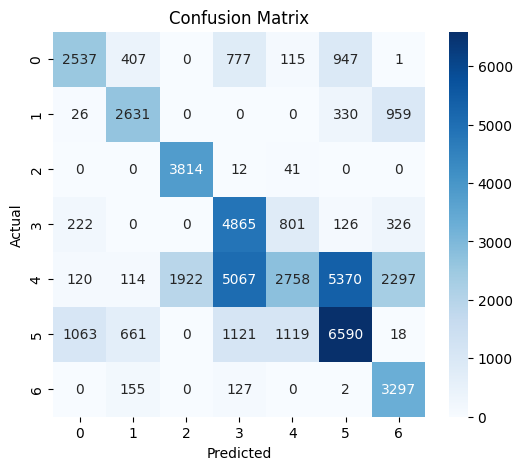

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix

CON_matNVB=confusion_matrix(y_test,y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(CON_matNVB, annot=True, cmap="Blues", fmt="d")

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [70]:
Analysis.loc[2,'Algorithm'] = 'NVB'
Analysis.loc[2,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Analysis.loc[2,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Analysis.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Analysis.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

print(Analysis)

  Algorithm  Precision    Recall  F1 Score  Accuracy
0       knn   0.894300  0.894300  0.894300  0.894300
2       NVB   0.522133  0.522133  0.522133  0.522133


BALANCED RANDOM FOREST

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using cross-validation
cv_scores = cross_val_score(rf_classifier, X_bal, y_bal, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())

# Fit the classifier on the full training data
rf_classifier.fit(X_bal, y_bal)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))


Cross-validation Scores: [0.99950853 0.99964257 0.99897239 0.99781074 0.99798937]
Mean Cross-validation Score: 0.9987847197691536
Accuracy: 0.9988371634672237
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4784
           1       0.99      1.00      0.99      3946
           2       1.00      1.00      1.00      3867
           3       1.00      1.00      1.00      6340
           4       1.00      1.00      1.00     17648
           5       1.00      1.00      1.00     10572
           6       1.00      1.00      1.00      3581

    accuracy                           1.00     50738
   macro avg       1.00      1.00      1.00     50738
weighted avg       1.00      1.00      1.00     50738

Confusion Matrix:
[[ 4784     0     0     0     0     0     0]
 [    0  3946     0     0     0     0     0]
 [    0     0  3867     0     0     0     0]
 [    0     0     0  6340     0     0     0]
 [    0    32     0    

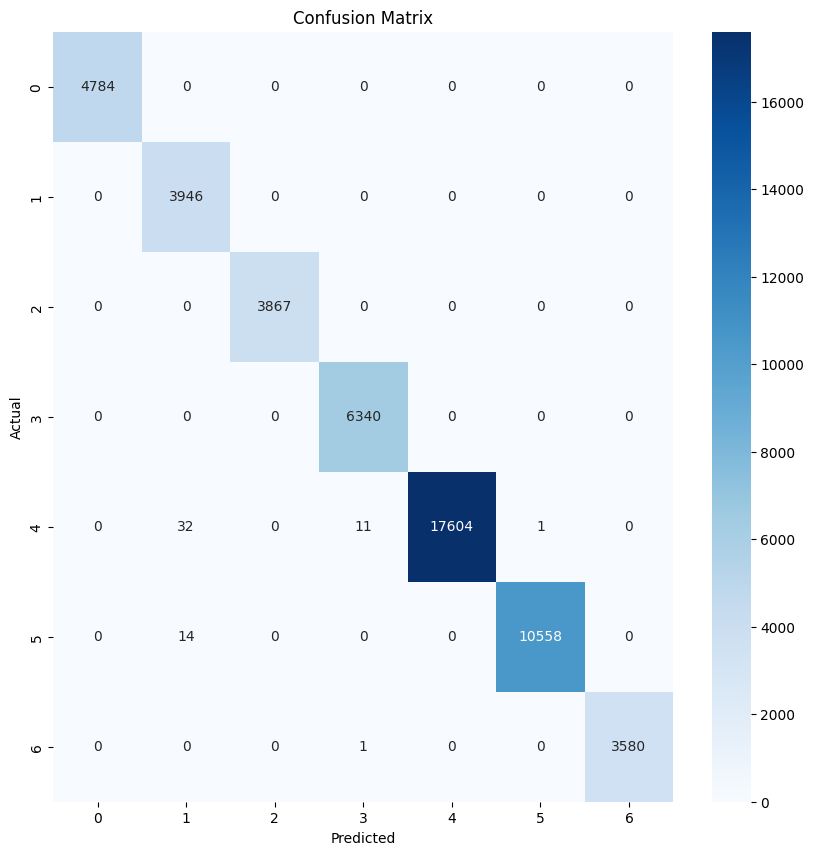

In [72]:
# Plot the confusion matrix as a heatmap
CON_matRF = (confusion_matrix(y_test, y_pred))
sns.heatmap(CON_matRF, annot=True, cmap="Blues", fmt="d")

# Set the axis labels and title

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [73]:
Analysis.loc[3,'Algorithm']='Random Forest'
Analysis.loc[3,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Analysis.loc[3,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Analysis.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Analysis.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

print(Analysis)

       Algorithm  Precision    Recall  F1 Score  Accuracy
0            knn   0.894300  0.894300  0.894300  0.894300
2            NVB   0.522133  0.522133  0.522133  0.522133
3  Random Forest   0.998837  0.998837  0.998837  0.998837


In [74]:
Analysis

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,knn,0.894300,0.894300,0.894300,0.894300
2,NVB,0.522133,0.522133,0.522133,0.522133
3,Random Forest,0.998837,0.998837,0.998837,0.998837


In [75]:
# Save the DataFrame to a CSV file
Analysis.to_csv('output.csv', index=False)

In [76]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Specify the filename you saved
filename = 'output.csv'

# Check if the file exists in the current directory
file_path = os.path.join(current_directory, filename)
if os.path.exists(file_path):
    print(f"The file '{filename}' exists in the current directory.")
else:
    print(f"The file '{filename}' does not exist in the current directory.")


The file 'output.csv' exists in the current directory.


<Axes: xlabel='Algorithm', ylabel='Accuracy'>

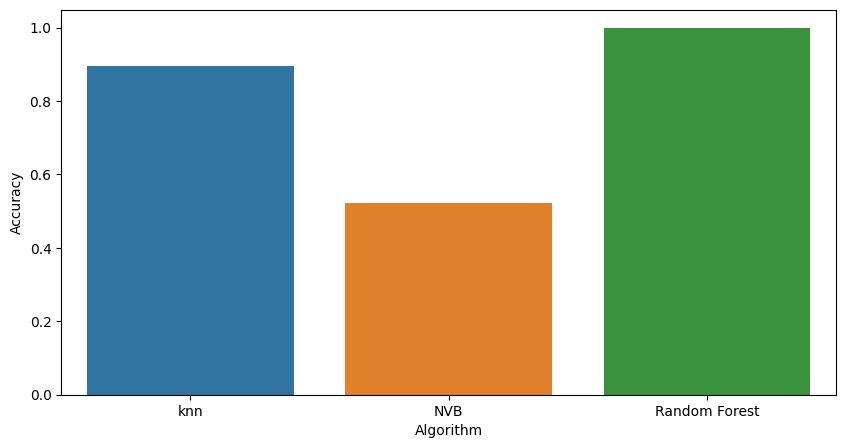

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Accuracy',data=Analysis)

<Axes: xlabel='Algorithm', ylabel='F1 Score'>

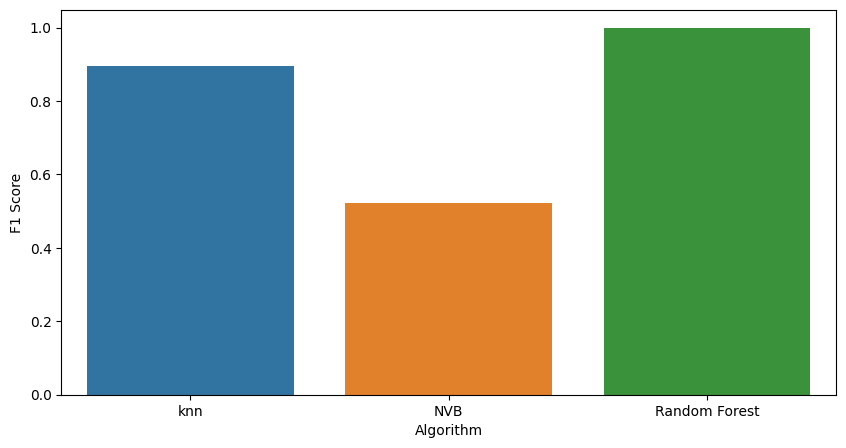

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='F1 Score',data=Analysis)

<Axes: xlabel='Algorithm', ylabel='Recall'>

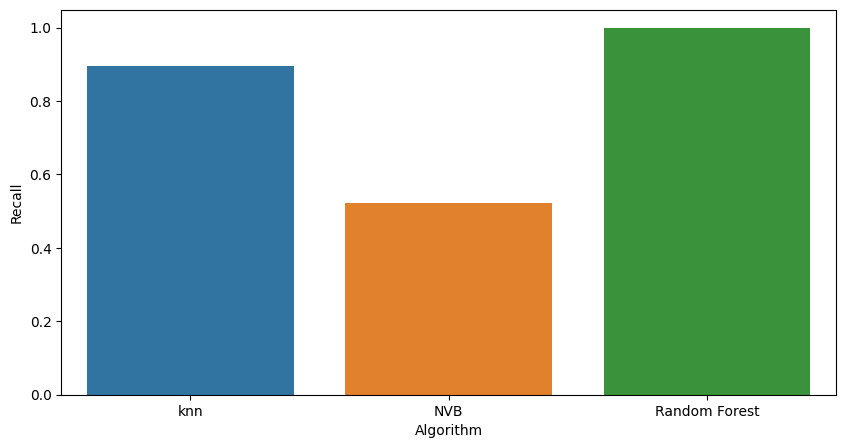

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Recall',data=Analysis)

<Axes: xlabel='Algorithm', ylabel='Precision'>

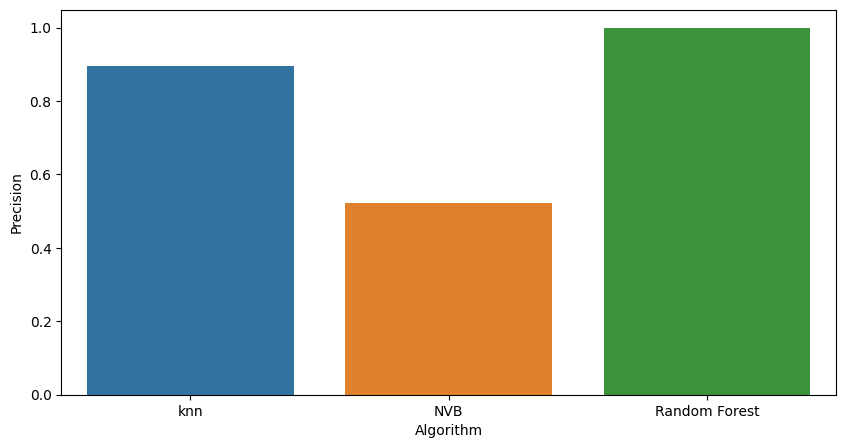

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Precision',data=Analysis)